In [1]:
import matplotlib.pyplot as plt
import keras
import h5py
import numpy as np

MODELNAME = 'data\\model_out\\build_n2_10e_relu.h5'
DATASET = 'data\\dataset.h5'
CL = ['GRA', 'HIS', 'IN', 'STUD', 'MIX', 'OUT_C', 'OUT_H', 'OTHER', 'SPE']
CL_DICT = {0: "Graphics [GRA]",
           1: "Historic [HIS]",
           2: "Indoor [IN]",
           3: "Indoor studio of CZTV [STUD]",
           4: "Mix [MIX]",
           5: "Outdoor country [OUT_C]",
           6: "Outdoor human made [OUT_H]",
           7: "Scene type other [OTHER]",
           8: "Speech [SPE]"}

bg_color = 'white'

Using TensorFlow backend.


In [2]:
model = keras.models.load_model(MODELNAME)
dataset = h5py.File(DATASET, 'r')
x_test = dataset["test_imgs"]
num_clusters = 0
if "cluster_names" in dataset.keys():
    num_clusters = len(dataset["cluster_names"])
else:
    num_clusters = max(dataset["test_imgs"][...]) + 1

y_test = keras.utils.to_categorical(dataset["test_clusters"], num_clusters)
shape = (len(dataset["test_imgs"][0]),
         len(dataset["test_imgs"][0][0]),
         len(dataset["test_imgs"][0][0][0]))

# evaluate
output_pred = model.predict(x_test)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


Title = which scene it really is
x axis = neural network classification
acc:  0.6496036988110965


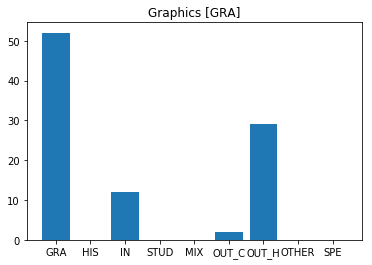

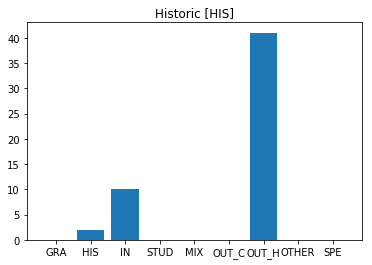

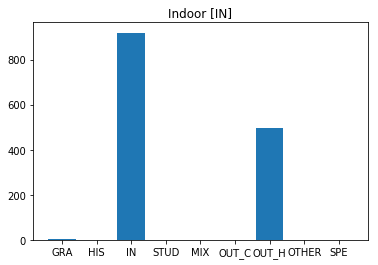

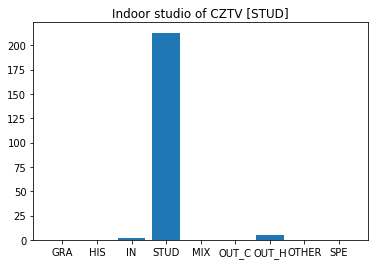

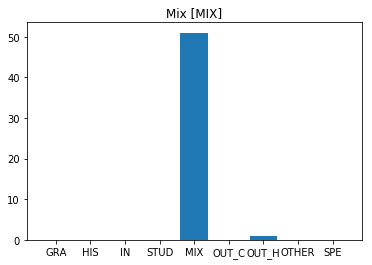

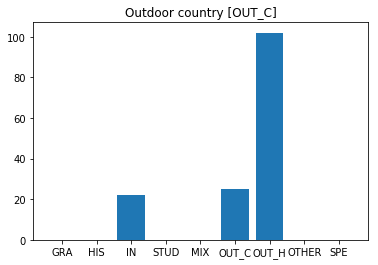

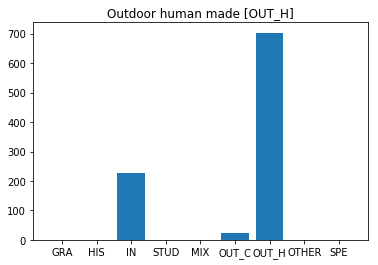

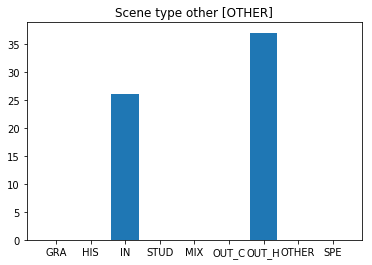

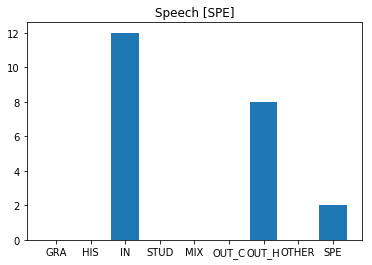

In [4]:
sucess_false_matrix = [[0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0]]
for i in range(0, len(y_test)):
    network_say = np.argmax(output_pred[i])
    teacher_say = np.argmax(y_test[i])
    sucess_false_matrix[teacher_say][network_say] += 1

s = 0
for i in range(0, 9):
    s += sucess_false_matrix[i][i]
    
print("Title = which scene it really is\nx axis = neural network classification")
print("acc: ", s / len(y_test))
for i in range(0, 9):
    plt.figure(facecolor=bg_color)
    plt.bar(CL, sucess_false_matrix[i])
    plt.title(CL_DICT[i])
    plt.show()
dataset.close()

Title = which scene it really is
x axis = neural network classification


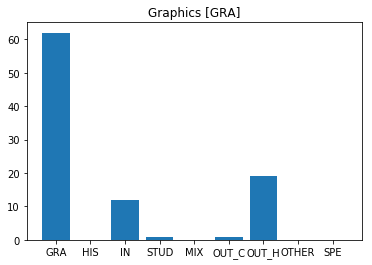

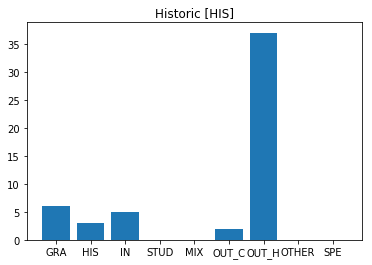

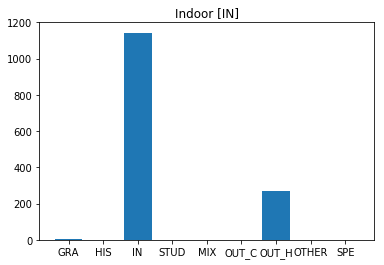

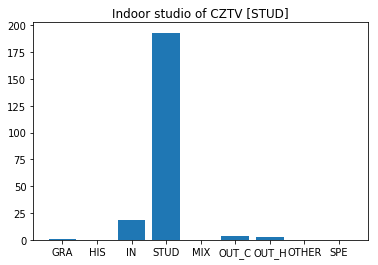

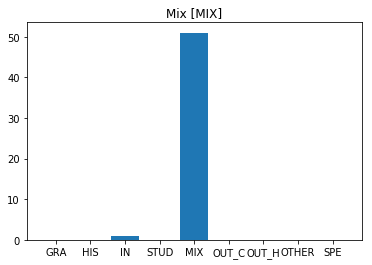

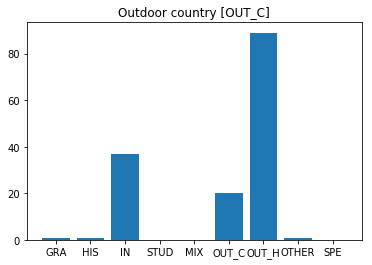

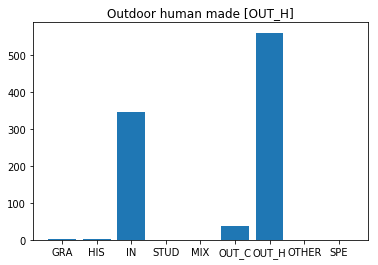

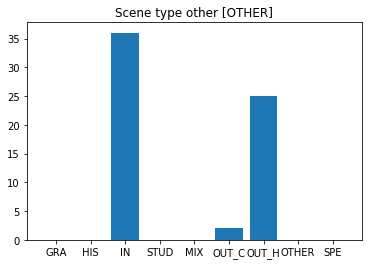

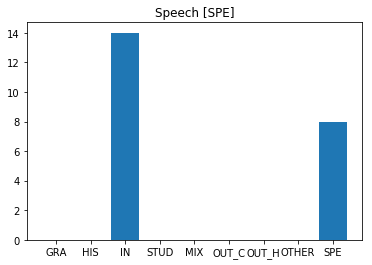

In [4]:
"""

        DONT REMOVE

        build2: 100 epochs, optimizer=keras.optimizers.sgd(lr=.001, momentum=.9, nesterov=True)

        acc:  0.6737120211360634
"""












print("Title = which scene it really is\nx axis = neural network classification")
print("acc: ", s / len(y_test))
for i in range(0, 9):
    plt.figure(facecolor=bg_color)
    plt.bar(CL, sucess_false_matrix[i])
    plt.title(CL_DICT[i])
    plt.show()

Title = which scene it really is
x axis = neural network classification


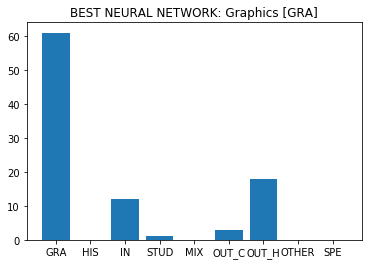

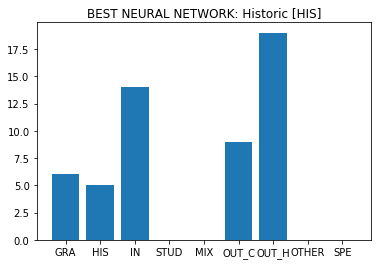

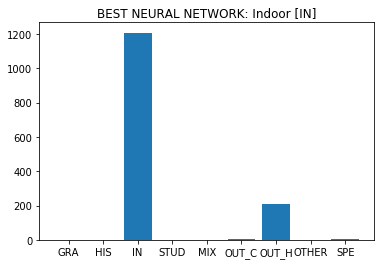

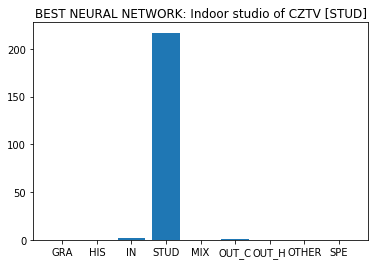

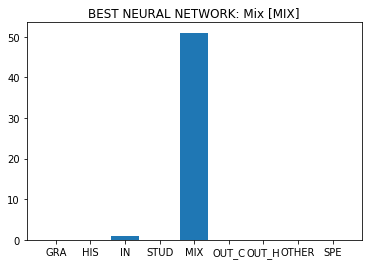

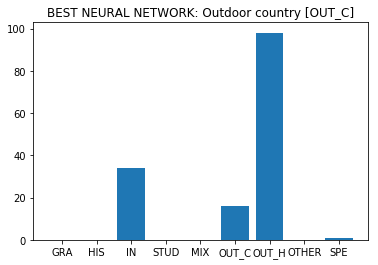

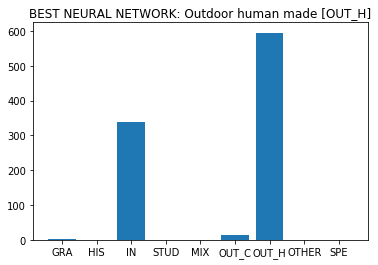

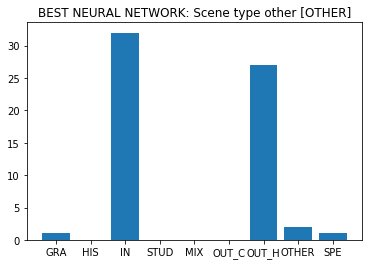

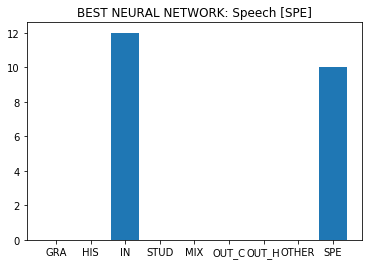

In [7]:
"""

        DONT REMOVE
        adadelta

        acc:  0.714663143989432
"""













print("Title = which scene it really is\nx axis = neural network classification")
for i in range(0, 9):
    plt.figure(facecolor=bg_color)
    plt.bar(CL, sucess_false_matrix[i])
    plt.title("BEST NEURAL NETWORK: " + CL_DICT[i])
    plt.show()